In [47]:
import os
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
import wavfile
from scipy.io.wavfile import read
from sklearn.neighbors import KNeighborsClassifier


In [48]:
absolute_path = os.path.dirname(
    "E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts/")
relative_path = "pattern"

fullpath = os.path.join(absolute_path, relative_path)


In [49]:
for count, filename in enumerate(os.listdir(fullpath)):
    print(filename)


.DS_Store
AnhSon
ChiBi


In [50]:
def calc_distances(sound_file):
    #The minimun value for the sound to be recognized as a knock
    min_val = 5000
    
    fs, data = read(sound_file)
    data_size = len(data)
    
    #The number of indexes on 0.15 seconds
    focus_size = int(0.15 * fs)
    
    focuses = []
    distances = []
    idx = 0
    
    while idx < len(data):
        if data[idx] > min_val:
            mean_idx = idx + focus_size // 2
            focuses.append(float(mean_idx) / data_size)
            if len(focuses) > 1:
                last_focus = focuses[-2]
                actual_focus = focuses[-1]
                distances.append(actual_focus - last_focus)
            idx += focus_size
        else:
            idx += 1
    return distances

In [51]:
def accept_test(pattern, test, min_error):
    if len(pattern) > len(test):
        return False
    for i, dt in enumerate(pattern):
        if not dt - test[i] < min_error:
            return False
    return True

### plot wav files

E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test.wav
E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test1.wav
E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test2.wav
E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test3.wav
E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test4.wav
E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test5.wav
E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test6.wav
E:/SOFT/General_Subjects/artificial_intelligence/colab-tts-Bahnar/bahnar_tts\pattern\AnhSon\conv-wav\test7.wav


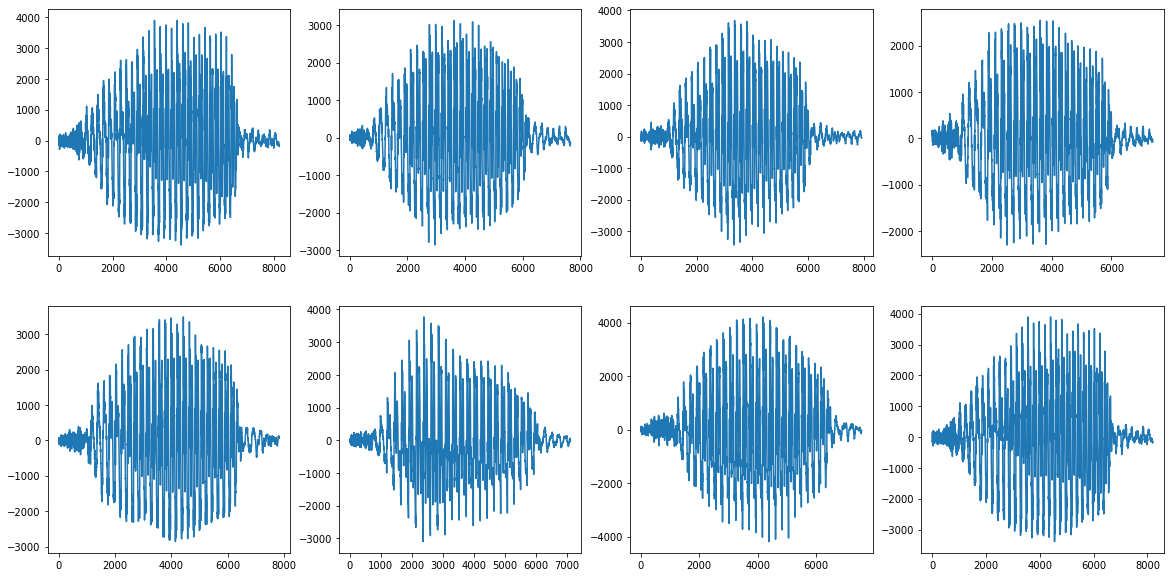

In [52]:
x = 0
y = 0
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for count, filename in enumerate(os.listdir(fullpath)):
    if filename == "AnhSon":
        subpath = os.path.join(fullpath, filename)
        for c, f in enumerate(os.listdir(subpath)):
            if f == "conv-wav":
                subsubpath = os.path.join(subpath, f)
                for c1, f1 in enumerate(os.listdir(subsubpath)):
                    audiopath = os.path.join(subsubpath, f1)
                    print(audiopath)
                    fs, data = read(audiopath)
                    input_data = read(audiopath)
                    audio = input_data[1]
                    axes[x, y].plot(audio)
                    y = y + 1
                    if y == 4:
                        y = 0
                        x = x + 1
                    import noisereduce as nr
                    # load data
                    rate, data = wavfile.read("mywav.wav")
                    # perform noise reduction
                    reduced_noise = nr.reduce_noise(y=data, sr=rate)
                    wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)


### noise reducion

### Process AnhSon's audio files

In [54]:
# for count, filename in enumerate(os.listdir(fullpath)):
#     if filename == "AnhSon":
#         subpath = os.path.join(fullpath, filename)
#         for c, f in enumerate(os.listdir(subpath)):
#             if f == "conv-wav":
#                 subsubpath = os.path.join(subpath,f)
#                 for c1, f1 in enumerate(os.listdir(subsubpath)):
#                     if f1.endswith('wav'):
#                         audiopath = os.path.join(subsubpath, f1)
#                         print(audiopath)
#                         fs, data = read(audiopath)
#                         # we will use the size of the array
#                         # to determine the duration of the sound
#                         data_size = len(data)

#                         # build k-nearest neighbors
#                         # ...


#                         pattern = calc_distances(f1)
#                         test = calc_distances( ) #filename to be processed

#                         min_error = 0.1
                        
#                         print(accept_test(pattern, test, min_error))

### plot wav files

### noise reducion

In [55]:
import noisereduce as nr
# load data
rate, data = wavfile.read("mywav.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("mywav_reduced_noise.wav", rate, reduced_noise)

NameError: name 'wavfile' is not defined